In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.svm import SVC
import seaborn as sns
from math import exp
from sklearn.datasets import make_classification
import handcalcs.render
from sklearn.datasets import make_blobs, make_gaussian_quantiles

In [2]:
data = pd.DataFrame({'Patient Height': [180,185,188,190,160,155,150,154],
                    'Patient Weights':[205,198,210,200, 156,133,145,135,],
                     'Heart Disease':[1,1,1,1,0,0,0,0]
                    })
data

,Patient Height,Patient Weights,Heart Disease
0,180,205,1
1,185,198,1
2,188,210,1
3,190,200,1
4,160,156,0
5,155,133,0
6,150,145,0
7,154,135,0


### Support Vector Machine (Linear Kernel)

> **Kernel: transform data into higher dimension feature space, then make a linear decision boundary on that dimension.**

In [3]:
X, y = data[['Patient Height', 'Patient Weights']], data['Heart Disease']

clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

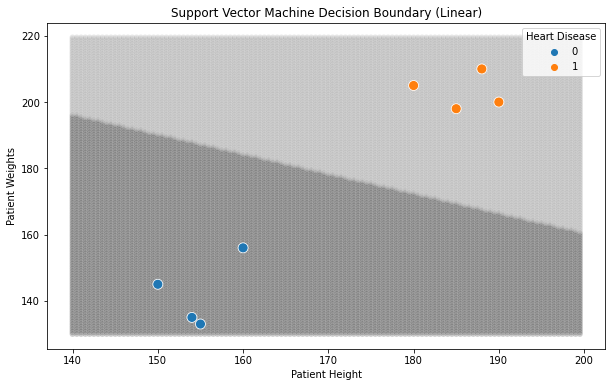

In [4]:
xx1, xx2 = np.meshgrid(np.arange(140, 200, 0.5), np.arange(130, 220, 0.5))
XX = np.vstack((xx1.ravel(), xx2.ravel())).T

yy = clf.predict(XX)

plt.figure(figsize=(10,6))
sns.scatterplot(x=XX[:,0], y=XX[:,1], hue=yy, palette = "gist_gray",  alpha = 0.3,sizes=[3,3],legend=False)
sns.scatterplot(x=data['Patient Height'], y=data['Patient Weights'], hue = data['Heart Disease'],  s = 100)
plt.title('Support Vector Machine Decision Boundary (Linear)')
plt.show()

In [5]:
a, b, r, d, gamma = 1,10,1,2,-10

### Support Vector Machine (Polynomial Kernel)

In [6]:
%%render

output  = (a*b+r)**2

<IPython.core.display.Latex object>

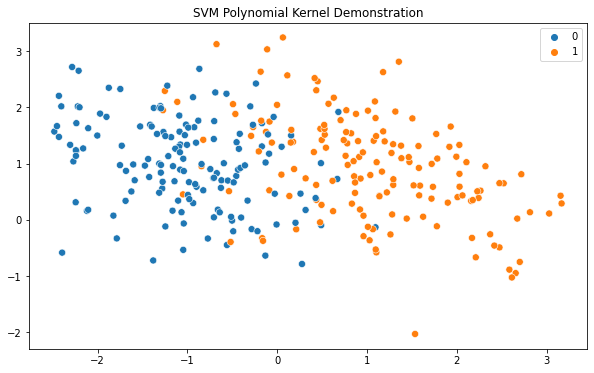

SVC(degree=2, kernel='poly')

In [7]:
X, y = make_classification(n_features=2, n_redundant=0,random_state=11, n_informative=2,
                             n_clusters_per_class=1, n_samples=300)

plt.figure(figsize=(10,6))
plt.title('SVM Polynomial Kernel Demonstration')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, s= 50)
plt.show()

clf = SVC(kernel='poly', degree=2)
clf.fit(X, y)

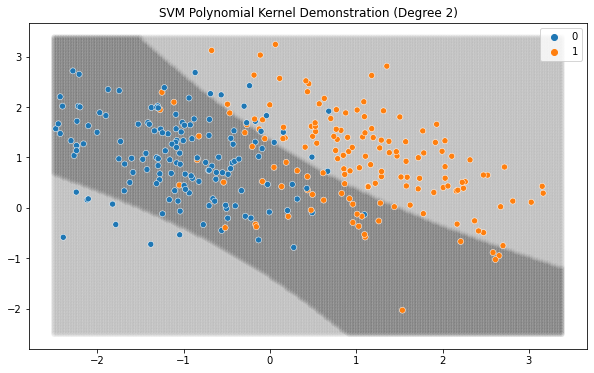

In [8]:
xx1,xx2 = np.meshgrid( np.arange(-25, 34, 0.3)/10, 
                       np.arange(-25, 34, 0.3)/10) 

XX = np.vstack((xx1.ravel(), xx2.ravel())).T
yy = clf.predict(XX)

plt.figure(figsize=(10,6))

plt.title('SVM Polynomial Kernel Demonstration (Degree 2)')
sns.scatterplot(y=XX[:,0], x=XX[:,1], hue=yy, palette = "gist_gray",  alpha = 0.2,sizes=[2,2],legend=False)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

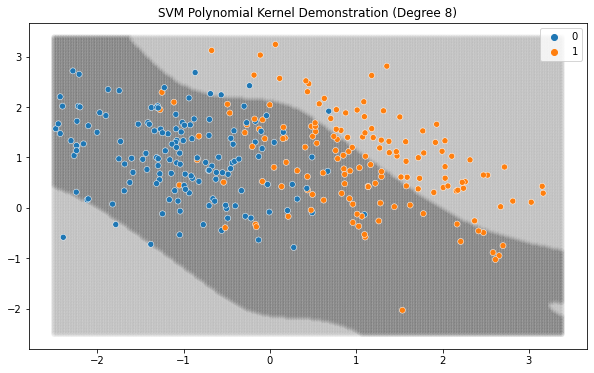

In [9]:
clf = SVC(kernel='poly', degree=8)
clf.fit(X, y)

xx1,xx2 = np.meshgrid( np.arange(-25, 34, 0.3)/10, 
                       np.arange(-25, 34, 0.3)/10) 

XX = np.vstack((xx1.ravel(), xx2.ravel())).T
yy = clf.predict(XX)

plt.figure(figsize=(10,6))

plt.title('SVM Polynomial Kernel Demonstration (Degree 8)')
sns.scatterplot(y=XX[:,0], x=XX[:,1], hue=yy, palette = "gist_gray",  alpha = 0.2,sizes=[2,2],legend=False)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

### Support Vector Machine (Radical Kernel)

In [10]:
%%render

out = exp(gamma * (a-b)**2)

<IPython.core.display.Latex object>

In [11]:
a,b,r,d, gamma = 1,1.5,1,2,-0.5

In [12]:
%%render

out = exp(gamma * (a-b)**2)

<IPython.core.display.Latex object>

**When we plug values into the Radial Kernel**

**We get high deimension relationship**

**We get 0.779 is the high dimension relationship between those two observations are close to each other**

**We get 0 is the high dimension relationship between those two observations are very far to each other**

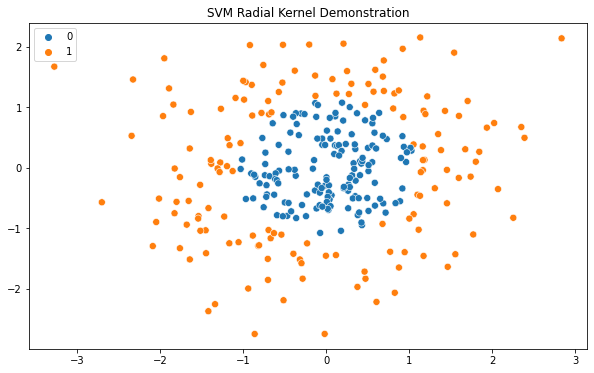

SVC(gamma=0.5)

In [13]:
X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=300)

plt.figure(figsize=(10,6))
plt.title('SVM Radial Kernel Demonstration')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, s= 50)
plt.show()

clf = SVC(kernel='rbf', gamma=0.5)
clf.fit(X, y)

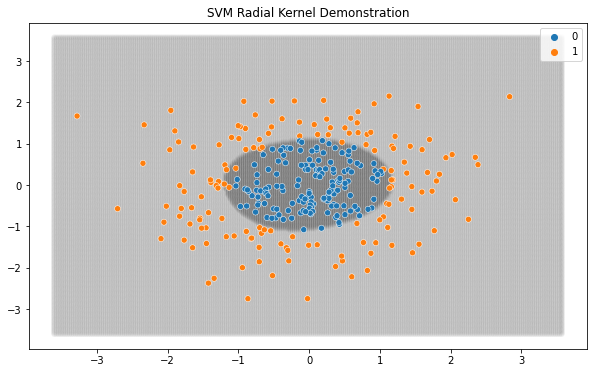

In [14]:
xx1,xx2 = np.meshgrid( np.arange(-36, 36, 0.3)/10,np.arange(-36, 36, 0.3)/10) 

XX = np.vstack((xx1.ravel(), xx2.ravel())).T
yy = clf.predict(XX)

plt.figure(figsize=(10,6))

plt.title('SVM Radial Kernel Demonstration')
sns.scatterplot(y=XX[:,0], x=XX[:,1], hue=yy, palette = "gist_gray",  alpha = 0.2,sizes=[2,2],legend=False)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

**Since we can expand this function into a Taylor Series**
**The value we get from radial Kernel is the relationship between two data points in infinite dimensions**